In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB

In [8]:
df_csv = pd.read_parquet("/content/drive/MyDrive/client.parquet")

In [9]:
# PREPROCESSING
df_csv['order_purchase_timestamp'] = pd.to_datetime(df_csv['order_purchase_timestamp'])
df_csv['order_estimated_delivery_date'] = pd.to_datetime(df_csv['order_estimated_delivery_date'])
df_csv['calc_delivery_time'] = (df_csv['order_estimated_delivery_date'] - df_csv['order_purchase_timestamp']).dt.days
df_csv['y'] = np.where(df_csv['review_score'] <= 3, 0, 1)

In [10]:
# SELECCION
features = ['price', 'freight_value', 'product_category_name', 'product_weight_g', 'calc_delivery_time']
target = 'y'

X = df_csv[features].copy()
y = df_csv[target]
X['product_weight_g'] = X['product_weight_g'].fillna(X['product_weight_g'].mean())
X['product_category_name'] = X['product_category_name'].fillna('unknown')

le = LabelEncoder()
X['product_category_name'] = le.fit_transform(X['product_category_name'].astype(str))

In [11]:
# DIVISIÓN DE ENTRENAMIENTO
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [13]:
# MODELOS
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, class_weight='balanced'),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced'),
    "SVM": make_pipeline(StandardScaler(), LinearSVC(class_weight='balanced', random_state=42, max_iter=2000, dual='auto')),
    "Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
}

trained_models = {}

for name, model in models.items():
    print(f"Entrenando {name}...")
    model.fit(X_train, y_train)
    trained_models[name] = model
print("FIN DE ENTRENAMIENTO")

Entrenando Logistic Regression...
Entrenando Random Forest...
Entrenando SVM...
Entrenando Naive Bayes...
Entrenando Gradient Boosting...
FIN DE ENTRENAMIENTO



EVALUACIÓN INDIVIDUAL DE MODELOS

Modelo: Logistic Regression
Accuracy: 0.5444
------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.26      0.48      0.34      8260
           1       0.77      0.56      0.65     25452

    accuracy                           0.54     33712
   macro avg       0.52      0.52      0.50     33712
weighted avg       0.65      0.54      0.58     33712



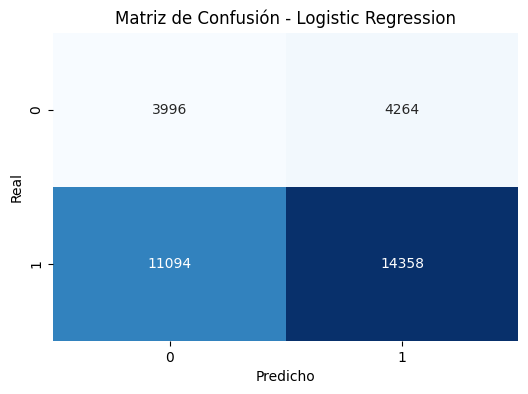

..................................................

Modelo: Random Forest
Accuracy: 0.7735
------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.28      0.38      8260
           1       0.80      0.93      0.86     25452

    accuracy                           0.77     33712
   macro avg       0.69      0.61      0.62     33712
weighted avg       0.75      0.77      0.74     33712



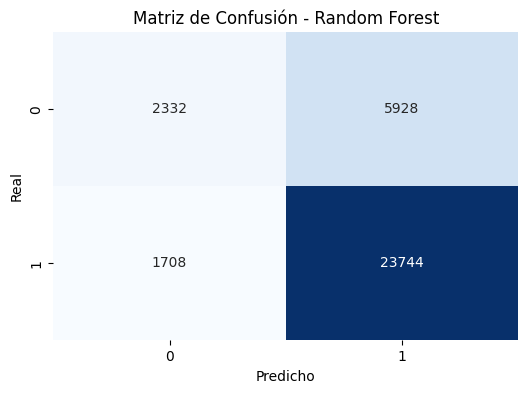

..................................................

Modelo: SVM
Accuracy: 0.5447
------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.26      0.48      0.34      8260
           1       0.77      0.56      0.65     25452

    accuracy                           0.54     33712
   macro avg       0.52      0.52      0.50     33712
weighted avg       0.65      0.54      0.58     33712



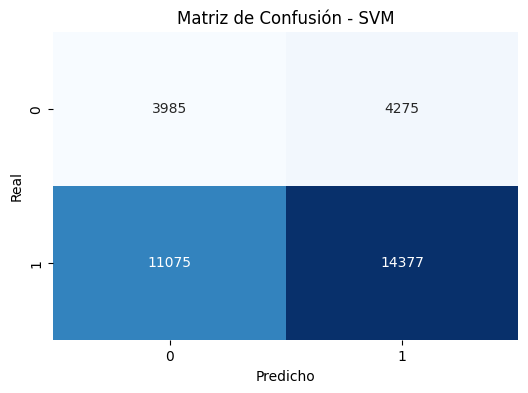

..................................................

Modelo: Naive Bayes
Accuracy: 0.7434
------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.32      0.04      0.08      8260
           1       0.76      0.97      0.85     25452

    accuracy                           0.74     33712
   macro avg       0.54      0.51      0.46     33712
weighted avg       0.65      0.74      0.66     33712



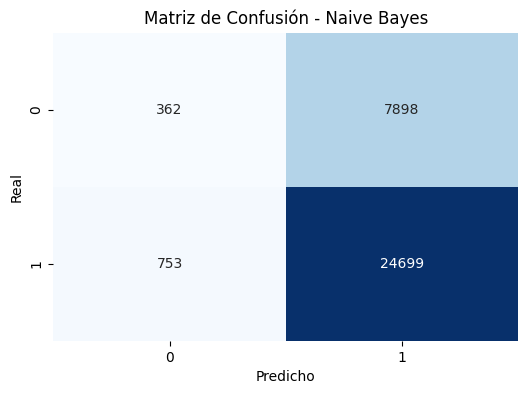

..................................................

Modelo: Gradient Boosting
Accuracy: 0.7558
------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.01      0.02      8260
           1       0.76      1.00      0.86     25452

    accuracy                           0.76     33712
   macro avg       0.67      0.50      0.44     33712
weighted avg       0.71      0.76      0.66     33712



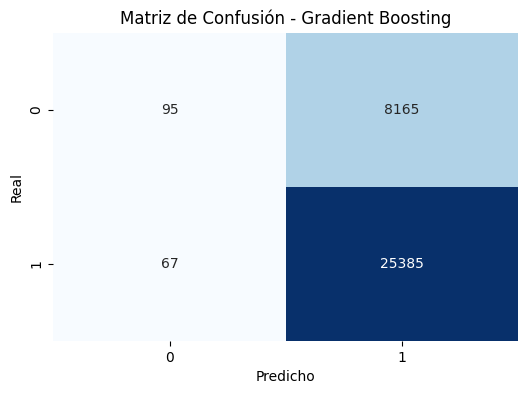

..................................................

COMPARACIÓN FINAL


/tmp/ipython-input-2402766728.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x="Accuracy", y="Model", data=df_results, palette="viridis")


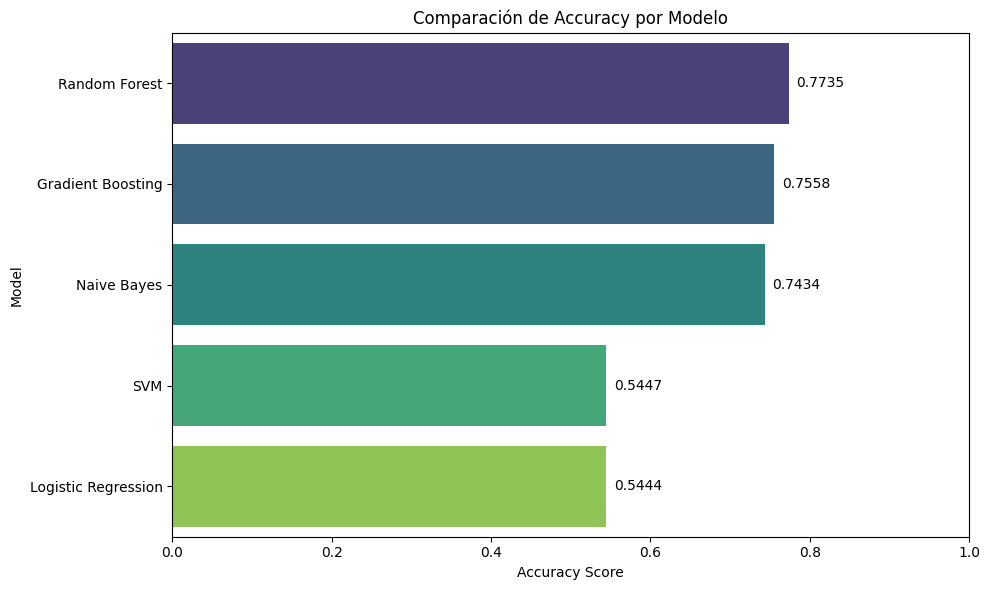

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

for name, model in trained_models.items():
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    results_summary.append({"Model": name, "Accuracy": acc})

    print(f"\nModelo: {name}")
    print(f"Accuracy: {acc:.4f}")
    print("-" * 30)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # GRAFICA
    plt.figure(figsize=(6, 4))

    cm = confusion_matrix(y_test, y_pred)

    # Mapa de calor
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)

    plt.title(f'Matriz de Confusión - {name}')
    plt.xlabel('Predicho')
    plt.ylabel('Real')
    plt.show()


df_results = pd.DataFrame(results_summary).sort_values(by="Accuracy", ascending=False)

# GRAFICO FINAL
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x="Accuracy", y="Model", data=df_results, palette="viridis")

plt.title('Comparación de Accuracy por Modelo')
plt.xlabel('Accuracy Score')
plt.xlim(0, 1.0)
for p in barplot.patches:
    width = p.get_width()
    plt.text(width + 0.01,
             p.get_y() + p.get_height() / 2,
             f'{width:.4f}',
             ha='left', va='center')

plt.tight_layout()
plt.show()